In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [25]:
df= pd.read_csv('stud.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [26]:
X = df.drop(columns=['math_score'],axis=1)
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [27]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [28]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns.tolist()
cat_features = X.select_dtypes(include="object").columns.tolist()

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [29]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

# Train Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

# Model accuracy cheake and traning

In [35]:
regressors = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "SVR": SVR(),
    "KNeighbors": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=1500, random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0),  # Suppress CatBoost output
    "XGBoost": XGBRegressor(eval_metric='rmse')  # Specify evaluation metric for XGBoost
}

results_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])

def evaluate_regressors(regressors, x_train, x_test, y_train, y_test):
    global results_df
    for name, reg in regressors.items():
        try:
            reg.fit(x_train, y_train)
            y_pred = reg.predict(x_test)

            # Calculate metrics
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)  # Calculate RMSE manually
            r2 = r2_score(y_test, y_pred)

            # Create a new row for results
            new_row = pd.DataFrame({
                'Model': [name],
                'MAE': [mae],
                'MSE': [mse],
                'RMSE': [rmse],
                'R2': [r2]
            })
            results_df = pd.concat([results_df, new_row], ignore_index=True)

        except Exception as e:
            print(f"Error with regressor {name}: {e}")
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

evaluate_regressors(regressors, x_train, x_test, y_train, y_test)
print(results_df)

               Model       MAE        MSE      RMSE        R2
0   LinearRegression  4.205273  28.915636  5.377326  0.881171
1              Ridge  4.211101  29.056272  5.390387  0.880593
2              Lasso  5.157882  42.506417  6.519695  0.825320
3                SVR  5.401539  66.042005  8.126623  0.728600
4         KNeighbors  5.611000  52.435000  7.241202  0.784518
5       DecisionTree  6.385000  64.885000  8.055123  0.733355
6       RandomForest  4.664897  36.212491  6.017682  0.851185
7           AdaBoost  4.780727  37.648498  6.135837  0.845283
8         ExtraTrees  4.858258  40.109293  6.333190  0.835171
9           CatBoost  4.612532  36.103658  6.008632  0.851632
10           XGBoost  5.084372  43.414137  6.588941  0.821589


In [46]:
# param_dist = {
#     'alpha': np.logspace(-3, 3, 100),  
#     'solver': ['auto', 'cholesky', 'saga', 'lsqr', 'sparse_cg']  
# }
# ridge_model = Ridge()



# ridge_search = RandomizedSearchCV(
#     ridge_model,
#     param_distributions=param_dist,
#     n_iter=100,  
#     cv=5, 
#     random_state=42,
#     scoring='neg_root_mean_squared_error' 
# )
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
ridge_score = r2_score(y_test, y_pred_ridge) * 100
print("Accuracy of the Ridge model is %.2f%%" % ridge_score)

Accuracy of the Ridge model is 88.06%


# Plot y_pred and y_test

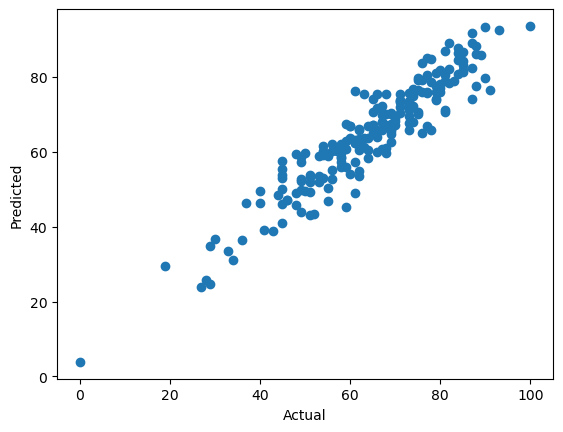

In [48]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

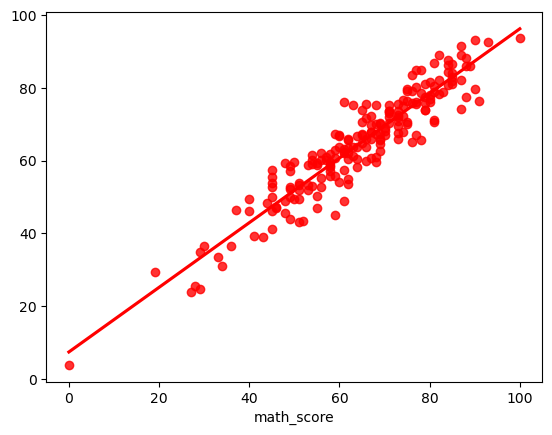

In [49]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [50]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.396821,14.603179
737,53,58.849771,-5.849771
740,80,76.991450,3.008550
660,74,76.813717,-2.813717
411,84,87.617754,-3.617754
...,...,...,...
408,52,43.478611,8.521389
332,62,62.167914,-0.167914
208,74,67.907003,6.092997
613,65,67.054951,-2.054951
